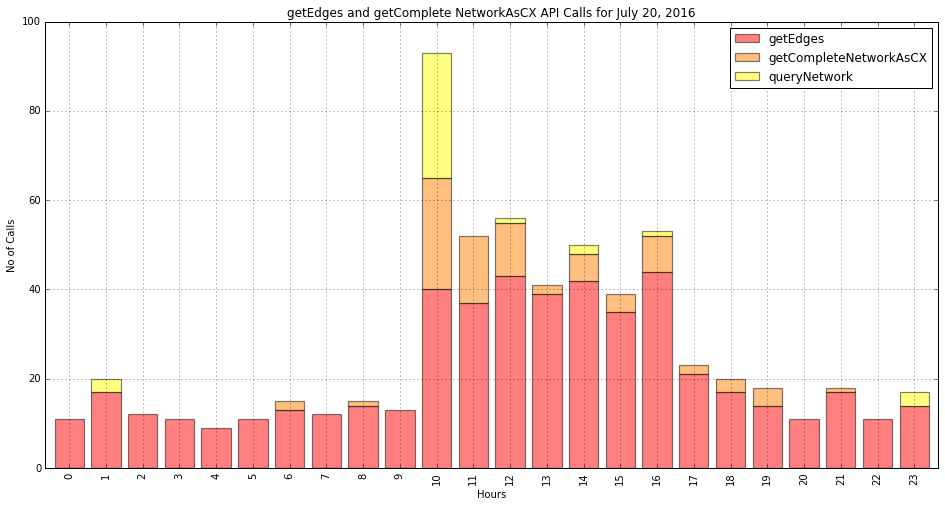

In [1]:
import psycopg2
import sys
import re


import numpy as np
import pandas as pd
from scipy import stats, integrate

%matplotlib inline
import matplotlib.pyplot as plt


# Define our connection string
conn_string = "host='52.43.75.12' port='5432' dbname='ndexstats' user='ndexstats' password='dashboard101'"

# print the connection string we will use to connect
# print "Connecting to database\n\t->%s" % (conn_string)

# get a connection, if a connect cannot be made an exception will be raised here
try:
    conn = psycopg2.connect(conn_string)
except:
    e = sys.exc_info()[0]
    print "Error: %s" % e 
    sys.exit()


# conn.cursor will return a cursor object for performing queries
cursor = conn.cursor()


query1 = "select count(transaction_id), transaction_hour from ndexstats where api='NetworkAService.getEdges' " + \
    " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
    " group by transaction_hour order by transaction_hour"

query2 = "select count(transaction_id), transaction_hour from ndexstats where api='NetworkAService.getCompleteNetworkAsCX' " + \
    " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
    " group by transaction_hour order by transaction_hour"

query3 = "select count(transaction_id), transaction_hour from ndexstats where api='NetworkAService.queryNetwork' " + \
    " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
    " group by transaction_hour order by transaction_hour"

getEdges = {}
getCompleteNetworkAsCX = {}
queryNetwork = {}

cursor.execute(query1)
for i in range(cursor.rowcount):
    row = cursor.fetchone()
    hour = row[1]
    count = row[0]
    getEdges[hour] = count

cursor.execute(query2)
for i in range(cursor.rowcount):
    row = cursor.fetchone()
    hour = row[1]
    count = row[0]
    getCompleteNetworkAsCX[hour] = count

cursor.execute(query3)
for i in range(cursor.rowcount):
    row = cursor.fetchone()
    hour = row[1]
    count = row[0]
    queryNetwork[hour] = count

cursor.close()
conn.close()

getCompleteNetworkAsCXSeries = pd.Series(getCompleteNetworkAsCX); 


API_Stats = {'Hours' : [n for n in range(0, 24)],
            'getEdges' : [getEdges.get(n) for n in range(0,24)],
            'getCompleteNetworkAsCX' : [getCompleteNetworkAsCX.get(n) for n in range(0,24)],
            'queryNetwork' : [queryNetwork.get(n) for n in range(0,24)]
            }

API_Stats_show = pd.DataFrame(API_Stats, index=API_Stats['Hours'], columns=['getEdges', 'getCompleteNetworkAsCX', 'queryNetwork'])
API_Stats_show.plot(kind='bar', grid=True, colormap='autumn', alpha=0.5, figsize=(16,8),\
                   title='getEdges and getComplete NetworkAsCX API Calls for July 20, 2016', \
                   width=.8, linewidth=1.2, stacked=True)

plt.xlabel('Hours')
plt.ylabel('No of Calls')
